In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
#Scaling
from sklearn.preprocessing import StandardScaler
#Spliting
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE

✍️ Explain the process of the dataframe
1. Original Dataset (**CervicalDF_original**): This is the raw dataset with all the collected data, which may contain missing values and redundant features.
2. Removing Columns with Excessive Missing Values (**CervicalDF**): Columns with more than 50% missing values were removed because they do not provide enough useful information for the model.
3. Imputing Missing Values (**CervicalDF_imputed**): The remaining missing values were filled. Numeric data was filled with the mean or median, and categorical data with the mode, ensuring that the dataset had no missing values.
4. Removing Highly Correlated Features (**CervicalDF2**): Highly correlated features (e.g., with correlation greater than 0.9) were removed to avoid redundancy and multicollinearity, which could affect model performance.
5. Selecting Features Highly Correlated with the Target Variable (**CervicalDF_selected**): Finally, features that were highly correlated with the target variable (Biopsy) were selected. This ensures that the dataset only includes the most predictive features for the model.

✍️ Give some information about the dataset

In [4]:
CervicalDF_original = pd.read_csv('risk_factors_cervical_cancer.csv')
CervicalDF_original.head()
# CervicalDF_original.info()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


✍️ Read the dataset, the missing value was shown as ?, so we need to change

In [6]:
# "?" Replacing missing values ​​represented by the sign with NaN
CervicalDF_original.replace("?", np.NaN, inplace=True)

In [7]:
CervicalDF_original.index

RangeIndex(start=0, stop=858, step=1)

In [8]:
CervicalDF_original.shape

(858, 36)

✍️ After showig dataset information, we need to handle missing value

In [10]:
# show and calculate the number of missing data 
missing_data_count = CervicalDF_original.isnull().sum()
missing_data_count

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

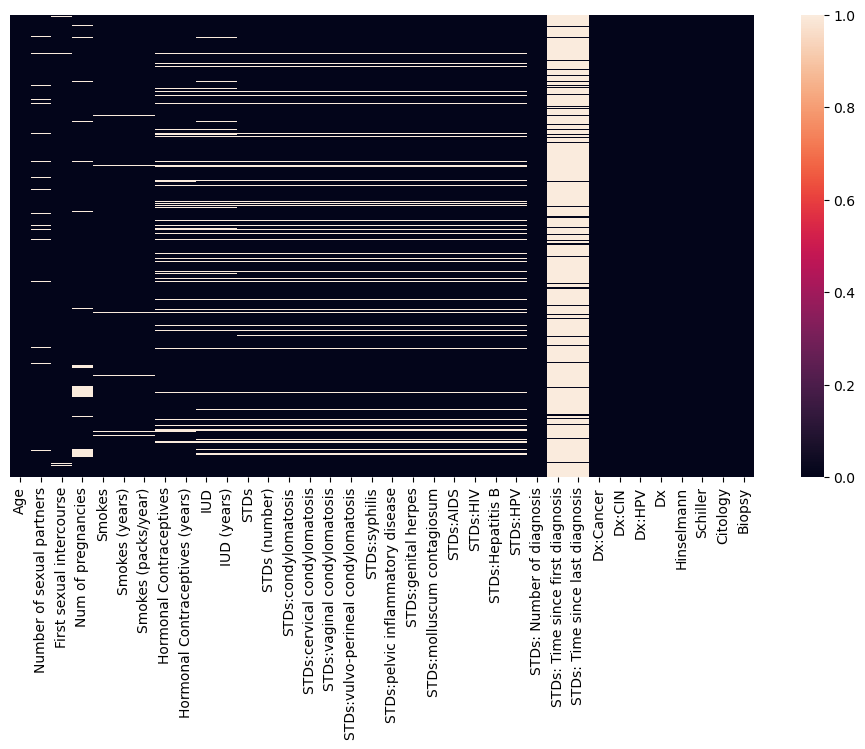

In [11]:
#Use heatmap to virtually show missing values
plt.figure(figsize = (12, 6))
sns.heatmap(CervicalDF_original.isnull(), yticklabels = False)
plt.savefig("missing value.png", dpi=300, bbox_inches='tight')

In [12]:
missing_data_columns = missing_data_count[missing_data_count > 0]
print("Columns with missing data and the number of missing values:")
print(missing_data_columns)

Columns with missing data and the number of missing values:
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B

In [13]:
# Remove columns with more than 50% missing values
missing_data_percentage = missing_data_count / len(CervicalDF_original)
CervicalDF = CervicalDF_original.loc[:, missing_data_percentage <= 0.5]

In [14]:
#check
CervicalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

✍️ Due to inconsistencies in the dataset, we first classified the columns into categorical and numerical types, and then converted their data types to float for consistency in analysis.

In [16]:
categorical_cols = [
    'Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis', 'STDs:cervical condylomatosis','STDs:vaginal condylomatosis',
    'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
    'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer',
    'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy'
]

numerical_cols = [
    'Age','Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes (years)','Smokes (packs/year)',
   'Hormonal Contraceptives (years)','IUD (years)','STDs (number)','STDs: Number of diagnosis'
]

CervicalDF[categorical_cols] = CervicalDF[categorical_cols].apply(lambda col: col.astype(str).astype('float'))
CervicalDF[numerical_cols] = CervicalDF[numerical_cols].apply(lambda col: col.astype(str).astype('float'))

print(CervicalDF.dtypes)


Age                                   float64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

/var/folders/9m/brj5dz214t77hy00y15pwt380000gn/T/ipykernel_18454/2246825309.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CervicalDF[categorical_cols] = CervicalDF[categorical_cols].apply(lambda col: col.astype(str).astype('float'))
/var/folders/9m/brj5dz214t77hy00y15pwt380000gn/T/ipykernel_18454/2246825309.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CervicalDF[numerical_cols] = CervicalDF[numerical_cols].apply(lambda col: col.astype(str).astype('float'))


✍️ We will use KNN to input numerical missing value and use mode to input categorical missing values

In [18]:
# Standardize numerical data
scaler = StandardScaler()
X_scaled_num = scaler.fit_transform(CervicalDF[numerical_cols])  

#✅Use KNN to input numerical missing data
knn_imputer = KNNImputer(n_neighbors=3) 
X_imputed_num = knn_imputer.fit_transform(X_scaled_num)

#Convert the filled numeric data into DataFrame format
CervicalDF_num_imputed = pd.DataFrame(X_imputed_num, columns=numerical_cols)

# Fill the categorical data with the mode
CervicalDF_cat_imputed = CervicalDF[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

# Merge filled numeric and categorical data
CervicalDF_imputed = pd.concat([CervicalDF_num_imputed, CervicalDF_cat_imputed], axis=1)

# Convert the padded numerical data from the standardized data back to the original scale
X_original_num = scaler.inverse_transform(CervicalDF_imputed[numerical_cols])

# Convert denormalized numeric data to DataFrame format
CervicalDF_imputed[numerical_cols] = pd.DataFrame(X_original_num, columns=numerical_cols)

print("✅ Data after filling:")
CervicalDF_imputed.info()

✅ Data after filling:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    float64
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes (years)                      858 non-null    float64
 5   Smokes (packs/year)                 858 non-null    float64
 6   Hormonal Contraceptives (years)     858 non-null    float64
 7   IUD (years)                         858 non-null    float64
 8   STDs (number)                       858 non-null    float64
 9   STDs: Number of diagnosis           858 non-null    float64
 10  Smokes                              858 non-null    float64
 11  Hormonal Contraceptives

In [19]:
#show the description of imputed dataframe
CervicalDF_imputed.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,...,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.00000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.520591,17.003497,2.255633,1.224551,0.451134,2.207018,0.49789,0.155400,0.087413,...,0.001166,0.002331,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.653790,2.795945,1.416475,4.073332,2.210704,3.606637,1.84445,0.529625,0.302545,...,0.034139,0.048252,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.00000,4.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


✍️ By visualizing the distribution of the target variable, I observed that the dataset is imbalanced. Therefore, it is necessary to **apply techniques to address this issue**.

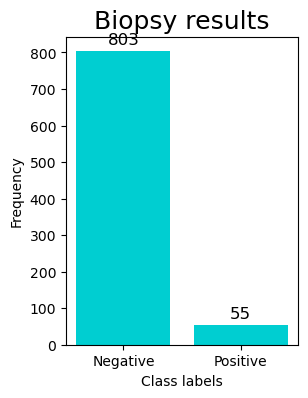

In [21]:
counts = CervicalDF_imputed['Biopsy'].value_counts()

# Create a bar chart
plt.figure(figsize = (3, 4))
plt.title('Biopsy results', fontsize = 18)
bars = plt.bar(['Negative', 'Positive'], [counts.get(0, 0), counts.get(1, 0)], color = 'darkturquoise')

for bar in bars:
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10,  
             str(int(yval)), 
             ha='center', va='bottom', fontsize=12)

plt.xlabel('Class labels')
plt.ylabel('Frequency')
plt.show()

✍️ After that, I will explore these features and try to find the relationship between these features.\
✍️ Do some analysis in these features and give some suggestion.

In [23]:
# Separating groups with positive and negative biopsy results
biopsy_positive = CervicalDF_imputed[CervicalDF_imputed['Biopsy'] == 1]
biopsy_negative = CervicalDF_imputed[CervicalDF_imputed['Biopsy'] == 0]
biopsy_positive[['Smokes (years)', 'Smokes (packs/year)', 'Smokes']].describe()

,Smokes (years),Smokes (packs/year),Smokes
count,55.000000,55.000000,55.000000
mean,2.150309,0.652967,0.181818
std,6.221669,2.264003,0.389249
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,34.000000,15.000000,1.000000


⚠️ Smoking Habit: Among patients with positive biopsy results, 18.18% reported smoking. On average, these individuals had smoked for 2.15 years and consumed approximately 0.65 packs per year. These findings suggest that smoking may be associated with an increased risk of abnormal biopsy results

In [25]:
biopsy_positive[['Age']].describe()

,Age
count,55.000000
mean,28.636364
std,8.884784
min,16.000000
25%,21.000000
50%,28.000000
75%,34.500000
max,52.000000


⚠️ Among patients with positive biopsy results, the average age is 28.64

In [27]:
biopsy_positive[['Hormonal Contraceptives (years)', 'Hormonal Contraceptives','IUD','STDs','Dx', 'Hinselmann', 'Schiller', 'Citology']].describe()

,Hormonal Contraceptives (years),Hormonal Contraceptives,IUD,STDs,Dx,Hinselmann,Schiller,Citology
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,3.318000,0.654545,0.163636,0.218182,0.127273,0.454545,0.872727,0.327273
std,5.409317,0.479899,0.373355,0.416818,0.336350,0.502519,0.336350,0.473542
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.500000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**These information are analysed based on the patients whose biopsy results are positive**\
⚠️ Hormonal Contraceptive Use and IUD Use: \
65.45% of patients used hormonal contraceptives with the average 3.32 years. Additionally, 16.36% used IUD.

⚠️ Cancer Diagnosis and Other Diagnoses:\
21.8% of patients were diagnosed with sexually transmitted diseases (STDs). \
12.7% had a diagnosis recorded under the general 'Dx' category.\
Among diagnostic screening tests on positive biopsy test results patients, 45.5% of patients had a positive result from the Hinselmann test, 87.3% from the Schiller test, and 32.7% from the Citology test. 

✍️ We used a correlation matrix virtually and numerically to identify pairs of features with high correlation. To avoid multicollinearity and redundancy in the model, we removed one feature from each highly correlated pair.

In [30]:
correlation_matrix = CervicalDF_imputed.corr()
correlation_matrix

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,...,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.088494,0.370616,0.546898,0.217206,0.131352,0.311104,0.219820,-0.002092,-0.001606,...,-0.027433,0.040861,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.088494,1.000000,-0.155676,0.090732,0.208329,0.182969,0.014646,0.005242,0.046522,0.062864,...,-0.010759,0.014020,0.022778,0.016021,0.027699,0.023545,-0.022176,0.003708,0.022679,0.012574
First sexual intercourse,0.370616,-0.155676,1.000000,-0.062197,-0.062533,-0.059220,0.026247,-0.014750,0.015130,-0.014156,...,0.012182,0.034536,0.066755,-0.032881,0.043472,0.035201,-0.017127,0.002587,-0.011637,0.006484
Num of pregnancies,0.546898,0.090732,-0.062197,1.000000,0.178944,0.104255,0.223173,0.165810,0.013349,0.035835,...,-0.030298,-0.025801,0.036758,0.021813,0.048248,0.029283,0.046003,0.093113,-0.024565,0.040134
Smokes (years),0.217206,0.208329,-0.062533,0.178944,1.000000,0.722722,0.055533,0.033622,0.099050,0.089344,...,0.098808,0.050765,0.051856,-0.030970,0.054387,-0.051027,0.068952,0.091428,-0.008584,0.059515
Smokes (packs/year),0.131352,0.182969,-0.059220,0.104255,0.722722,1.000000,0.049050,0.012730,0.034697,0.035726,...,0.101251,-0.008120,0.106890,-0.021023,0.108779,-0.034638,0.025629,0.016522,0.003739,0.023908
Hormonal Contraceptives (years),0.311104,0.014646,0.026247,0.223173,0.055533,0.049050,1.000000,0.006745,-0.004419,-0.029625,...,-0.020915,0.050864,0.055307,0.001492,0.057571,-0.015809,0.040709,0.081007,0.070068,0.080664
IUD (years),0.219820,0.005242,-0.014750,0.165810,0.033622,0.012730,0.006745,1.000000,0.025811,0.019666,...,-0.009226,-0.013056,0.097226,0.022315,0.031050,0.104017,0.022855,0.087235,0.000820,0.042031
STDs (number),-0.002092,0.046522,0.015130,0.013349,0.099050,0.034697,-0.004419,0.025811,1.000000,0.898219,...,0.119041,0.077128,-0.012248,-0.008615,-0.012248,-0.023096,0.073033,0.129421,0.061517,0.102959
STDs: Number of diagnosis,-0.001606,0.062864,-0.014156,0.035835,0.089344,0.035726,-0.029625,0.019666,0.898219,1.000000,...,0.103097,0.065957,-0.015423,0.008070,-0.015423,-0.002289,0.076787,0.130873,0.055114,0.097449


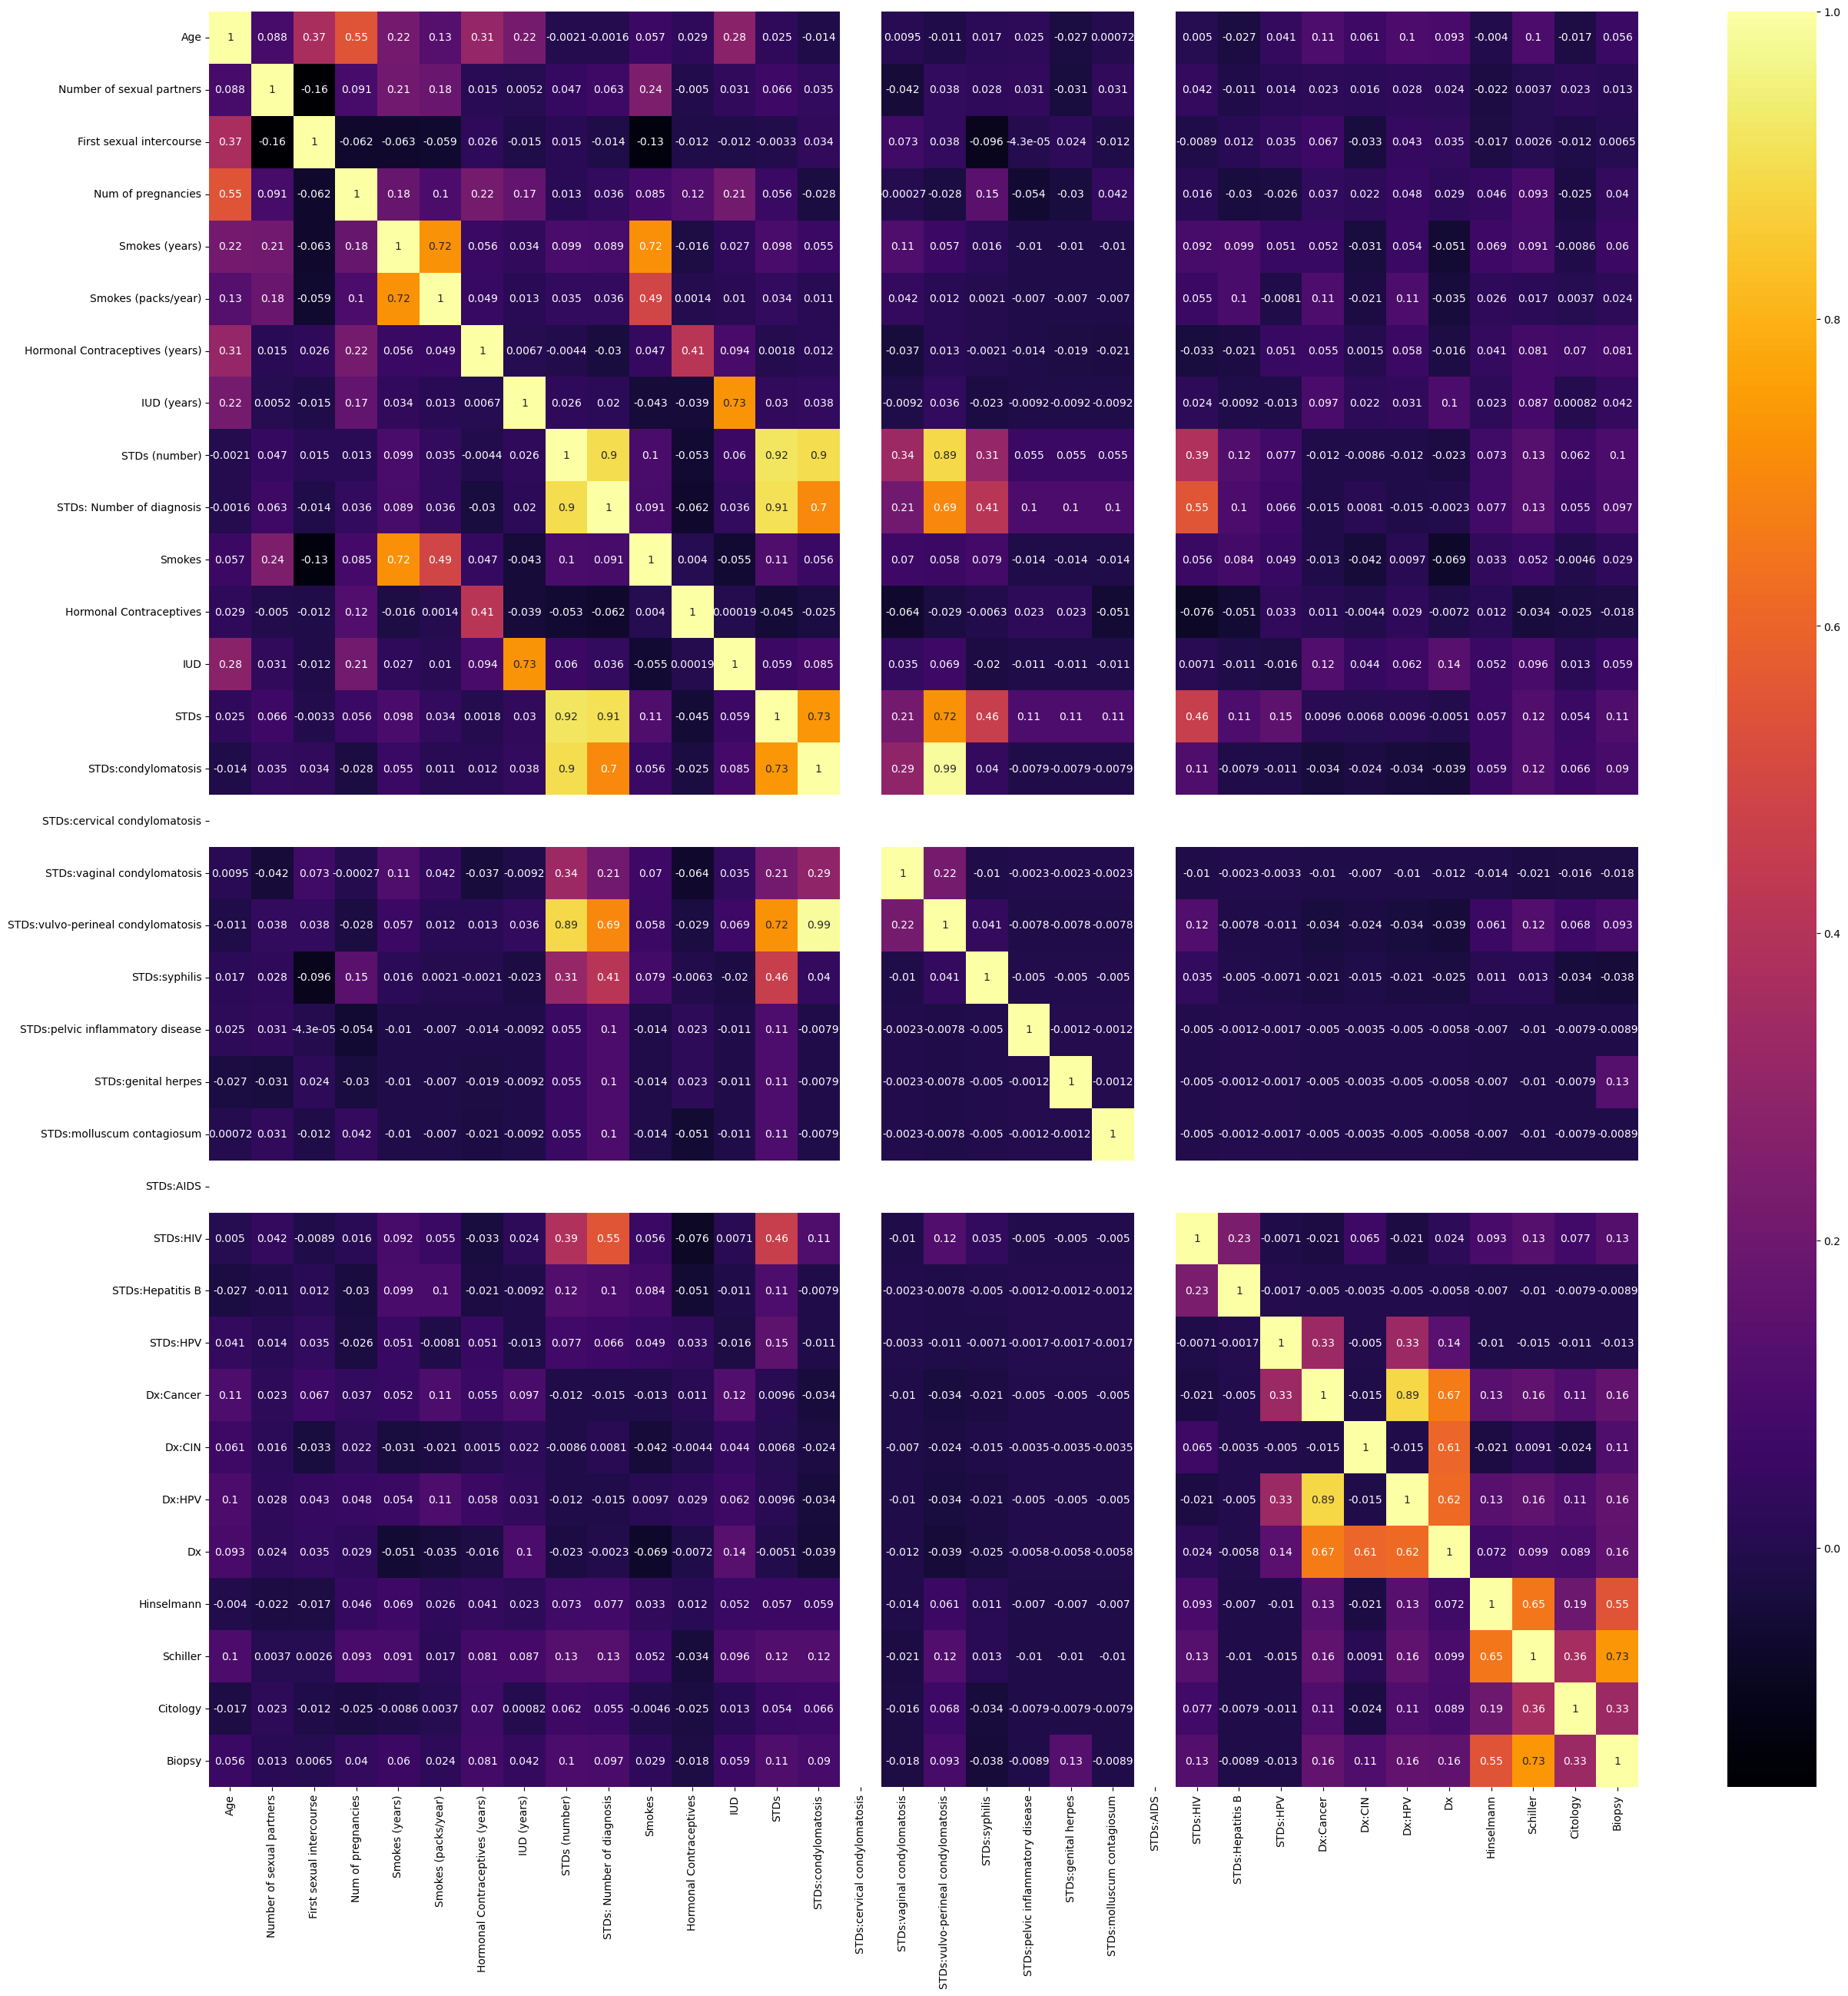

In [31]:
plt.figure(figsize = (30, 30))
sns.heatmap(correlation_matrix, 
            annot = True, 
            cmap = 'inferno')
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')

In [32]:
threshold = 0.8
# Find feature pairs whose correlation is greater than the threshold
correlation_matrix = correlation_matrix.abs()  # calculate the absolute value
mask = (correlation_matrix > threshold) & (correlation_matrix < 1)  

In [33]:
# Get columns with high correlation
high_correlation_pairs = []

In [34]:
for row in range(mask.shape[0]):
    for col in range(row):
        if mask.iloc[row, col]:
            high_correlation_pairs.append((correlation_matrix.columns[row], correlation_matrix.columns[col]))


In [35]:
# Output feature pairs with high correlation
print("High correlation pairs (above threshold):")
print(high_correlation_pairs)

High correlation pairs (above threshold):
[('STDs: Number of diagnosis', 'STDs (number)'), ('STDs', 'STDs (number)'), ('STDs', 'STDs: Number of diagnosis'), ('STDs:condylomatosis', 'STDs (number)'), ('STDs:vulvo-perineal condylomatosis', 'STDs (number)'), ('STDs:vulvo-perineal condylomatosis', 'STDs:condylomatosis'), ('Dx:HPV', 'Dx:Cancer')]


In [36]:
# Remove features with high correlation
# Choose to delete one of the features
# Output the choosed features
to_remove = set()
for col1, col2 in high_correlation_pairs:
     to_remove.add(col1)

In [37]:
CervicalDF2 = CervicalDF_imputed.drop(columns=to_remove)
print(f"Columns removed: {to_remove}")

Columns removed: {'Dx:HPV', 'STDs', 'STDs:condylomatosis', 'STDs: Number of diagnosis', 'STDs:vulvo-perineal condylomatosis'}


In [38]:
CervicalDF2.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'Smokes', 'Hormonal Contraceptives', 'IUD',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx',
       'Hinselmann', 'Schiller', 'Citology', 'Biopsy'],
      dtype='object')

/opt/homebrew/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



Features with correlation greater than 0.05 (sorted in descending order):
Biopsy                             1.000000
Schiller                           0.733204
Hinselmann                         0.547417
Citology                           0.327466
Dx:Cancer                          0.160905
Dx                                 0.157607
STDs:genital herpes                0.130523
STDs:HIV                           0.127702
Dx:CIN                             0.113172
STDs (number)                      0.102959
Hormonal Contraceptives (years)    0.080664
Smokes (years)                     0.059515
IUD                                0.059231
Age                                0.055956
dtype: float64


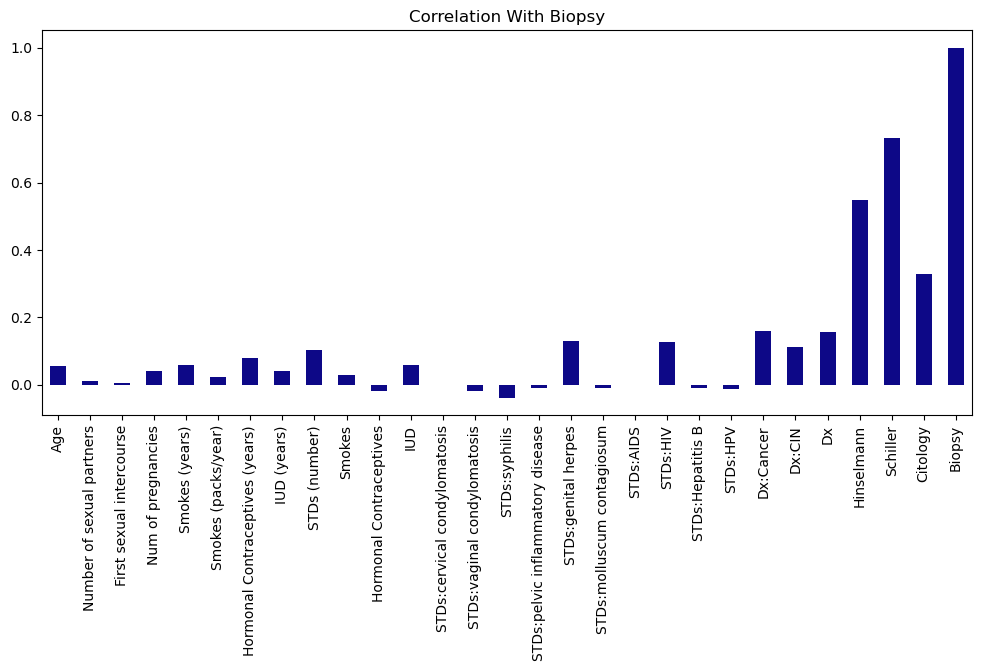

In [39]:
correlation_with_biopsy = CervicalDF2.corrwith(CervicalDF2['Biopsy'])


correlation_with_biopsy.plot.bar(
    title='Correlation With Biopsy',
    figsize=(12, 5),
    cmap='plasma'
)
plt.savefig("correlation_with_Biopsy.png", dpi=300, bbox_inches='tight')


# Filter out features with correlation greater than 0.05
high = correlation_with_biopsy[abs(correlation_with_biopsy) > 0.05]
high_correlation = high.sort_values(ascending=False)

print("\nFeatures with correlation greater than 0.05 (sorted in descending order):")
print(high_correlation)

✍️ We get Schiller, Hinselmann, Citology, Dx:Cancer, Dx, STDs:genital herpes have a high relationship with the result of Biopsy.

In [41]:
# Select features with high correlation with Biopsy
selected = high_correlation.index
CervicalDF_selected = CervicalDF2[selected]

print("\nFiltered data frame (with Biospy) columns:")
print(CervicalDF_selected.columns)


Filtered data frame (with Biospy) columns:
Index(['Biopsy', 'Schiller', 'Hinselmann', 'Citology', 'Dx:Cancer', 'Dx',
       'STDs:genital herpes', 'STDs:HIV', 'Dx:CIN', 'STDs (number)',
       'Hormonal Contraceptives (years)', 'Smokes (years)', 'IUD', 'Age'],
      dtype='object')


✍️ Initially, I computed the correlation matrix to identify features with strong relationships to the target variable. These selected features were then used for building the predictive model.

In [43]:
 selected_features = ['Biopsy','Schiller', 'Hinselmann', 'Citology', 'Dx:Cancer', 'Dx',
       'STDs:genital herpes', 'STDs:HIV', 'Dx:CIN', 'STDs (number)',
       'Hormonal Contraceptives (years)', 'Smokes (years)', 'IUD', 'Age']

✍️ In the final step, I used permutation importance to identify the most influential features and updated the selected_features accordingly.

In [45]:
# selected_features=['Biopsy','Schiller', 'Age', 'Hormonal Contraceptives (years)' ,'Citology',
#  'Smokes (years)', 'Hinselmann']

In [46]:
print("\n New filtered data frame (without Biospy) columns:")
CervicalDF_selected = CervicalDF2[selected_features]
print(CervicalDF_selected.columns)


 New filtered data frame (without Biospy) columns:
Index(['Biopsy', 'Schiller', 'Hinselmann', 'Citology', 'Dx:Cancer', 'Dx',
       'STDs:genital herpes', 'STDs:HIV', 'Dx:CIN', 'STDs (number)',
       'Hormonal Contraceptives (years)', 'Smokes (years)', 'IUD', 'Age'],
      dtype='object')


✍️ classify the numerical columns and categorical columns

In [48]:
numerical_cols = [
    col for col in CervicalDF_selected[selected_features].columns
    if CervicalDF_selected[col].nunique() > 2
]
print('Numerical columns:', numerical_cols)


categorical_cols = [
    col for col in CervicalDF_selected[selected_features].columns
    if CervicalDF_selected[col].nunique() <= 2
]
print('Categorical columns:', categorical_cols)

Numerical columns: ['STDs (number)', 'Hormonal Contraceptives (years)', 'Smokes (years)', 'Age']
Categorical columns: ['Biopsy', 'Schiller', 'Hinselmann', 'Citology', 'Dx:Cancer', 'Dx', 'STDs:genital herpes', 'STDs:HIV', 'Dx:CIN', 'IUD']


In [49]:
#show te distribution of new selected numberical columns

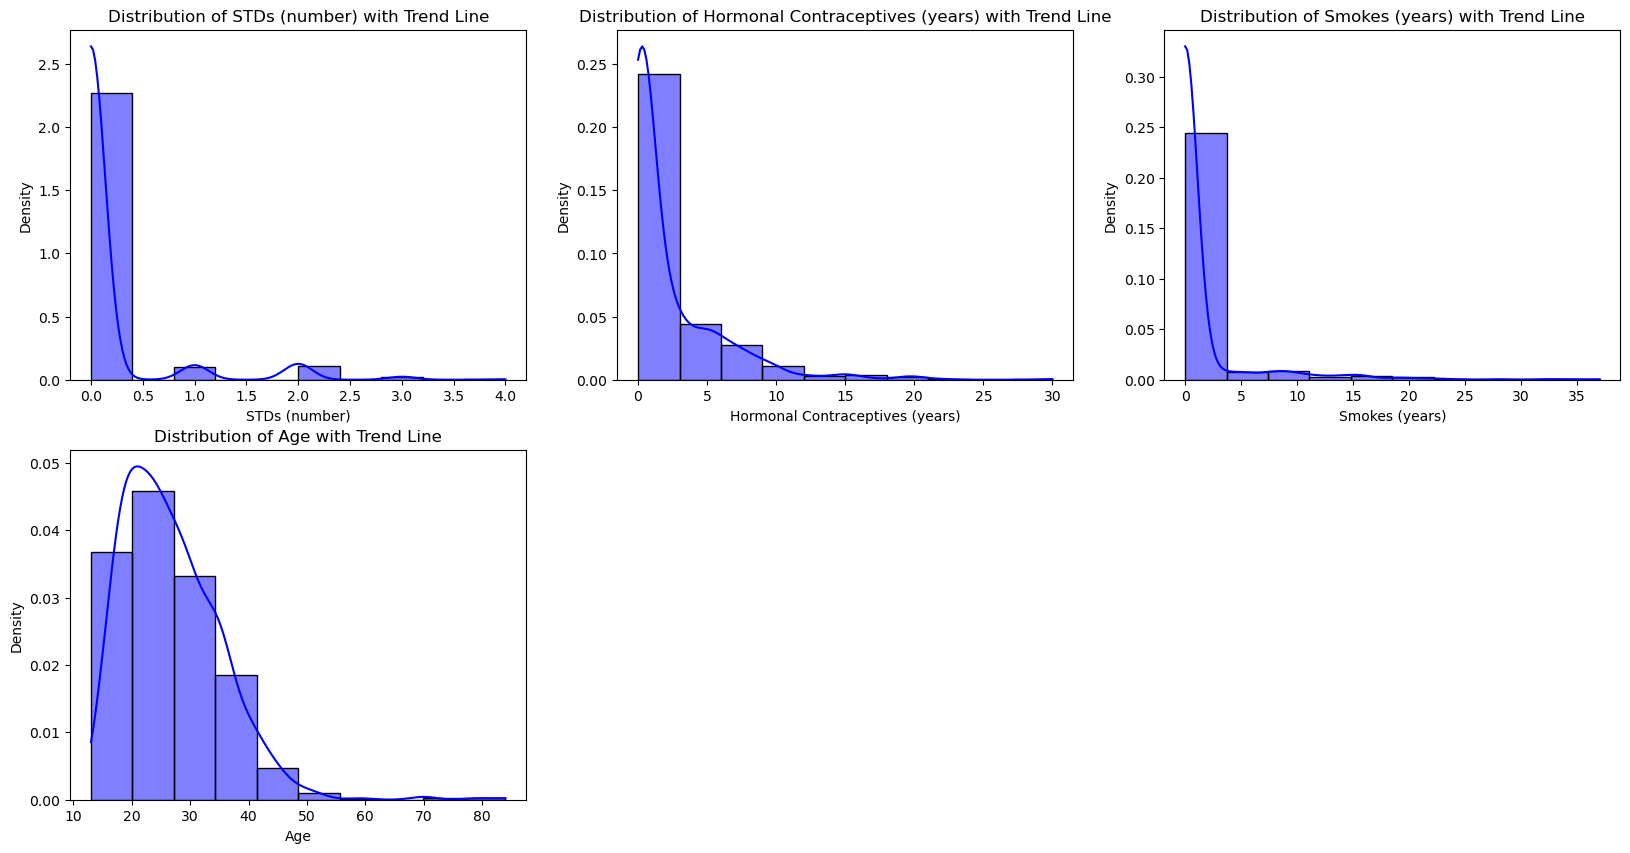

In [50]:
plt.figure(figsize=(20, 10))
n_cols = 3
n_rows = (len(numerical_cols) // n_cols) + (1 if len(numerical_cols) % n_cols != 0 else 0)

# Draw histograms and KDE for each numeric column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i) 
    sns.histplot(CervicalDF_selected[col], kde=True, bins=10, color='blue', stat='density')
    plt.title(f"Distribution of {col} with Trend Line")

✍️ Boxplot and descriptive statistics were used to compare the **age/ Smokes (years)/  Hormonal Contraceptives (years)/ STDs: Number of diagnosis**  distributions of the two results of Biopsy.

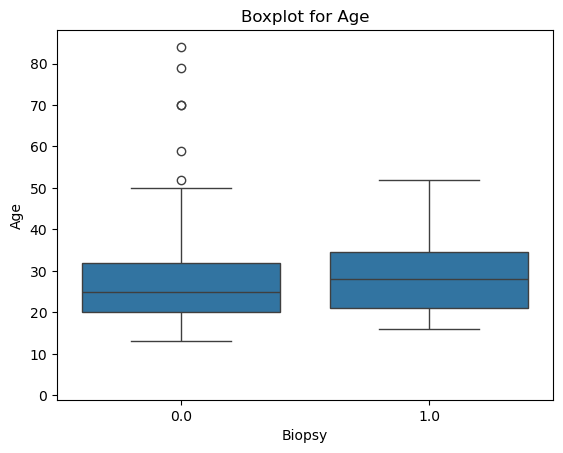

biopsy_negative count    803.000000
mean      26.696139
std        8.462316
min       13.000000
25%       20.000000
50%       25.000000
75%       32.000000
max       84.000000
Name: Age, dtype: float64
biopsy_positive count    55.000000
mean     28.636364
std       8.884784
min      16.000000
25%      21.000000
50%      28.000000
75%      34.500000
max      52.000000
Name: Age, dtype: float64


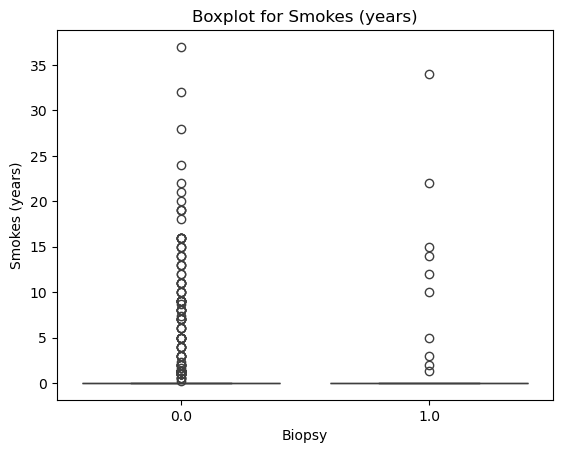

biopsy_negative count    803.000000
mean       1.161143
std        3.880817
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       37.000000
Name: Smokes (years), dtype: float64
biopsy_positive count    55.000000
mean      2.150309
std       6.221669
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      34.000000
Name: Smokes (years), dtype: float64


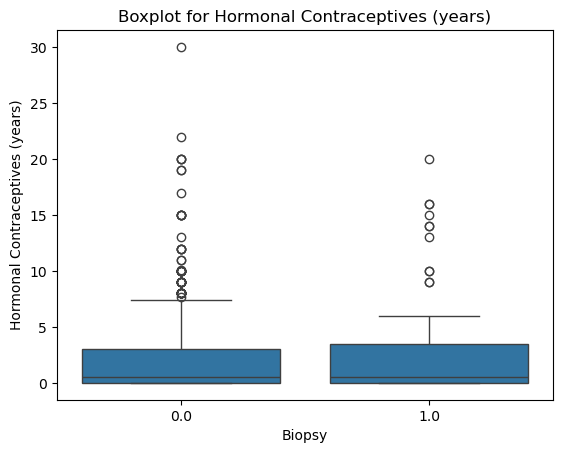

biopsy_negative count    803.000000
mean       2.130923
std        3.440825
min        0.000000
25%        0.000000
50%        0.500000
75%        3.000000
max       30.000000
Name: Hormonal Contraceptives (years), dtype: float64
biopsy_positive count    55.000000
mean      3.318000
std       5.409317
min       0.000000
25%       0.000000
50%       0.500000
75%       3.500000
max      20.000000
Name: Hormonal Contraceptives (years), dtype: float64


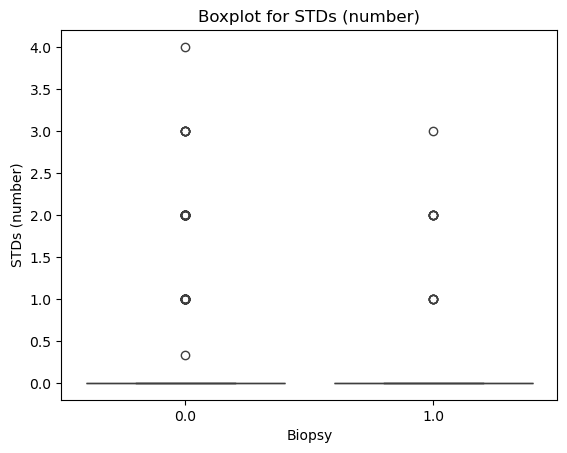

biopsy_negative count    803.000000
mean       0.141137
std        0.508182
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: STDs (number), dtype: float64
biopsy_positive count    55.000000
mean      0.363636
std       0.754337
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       3.000000
Name: STDs (number), dtype: float64


In [52]:

#Age
plt.plot(2, 3)
sns.boxplot(x='Biopsy', y='Age', data=CervicalDF2)
plt.title("Boxplot for Age")
plt.show()

print('biopsy_negative',biopsy_negative['Age'].describe())
print('biopsy_positive',biopsy_positive['Age'].describe())

#Smokes (years)
plt.plot(2, 3)
sns.boxplot(x='Biopsy', y='Smokes (years)', data=CervicalDF2)
plt.title("Boxplot for Smokes (years)")
plt.show()

print('biopsy_negative',biopsy_negative['Smokes (years)'].describe())
print('biopsy_positive',biopsy_positive['Smokes (years)'].describe())

#Hormonal Contraceptives (years)
plt.plot(2, 3)
sns.boxplot(x='Biopsy', y='Hormonal Contraceptives (years)', data=CervicalDF2)
plt.title("Boxplot for Hormonal Contraceptives (years)")
plt.show()

print('biopsy_negative',biopsy_negative['Hormonal Contraceptives (years)'].describe())
print('biopsy_positive',biopsy_positive['Hormonal Contraceptives (years)'].describe())

#STDs (number)
plt.plot(2, 3)
sns.boxplot(x='Biopsy', y='STDs (number)', data=CervicalDF2)
plt.title("Boxplot for STDs (number)")
plt.show()

print('biopsy_negative',biopsy_negative['STDs (number)'].describe())
print('biopsy_positive',biopsy_positive['STDs (number)'].describe())


### Model training

In [54]:
# Extract features (X) and target variables (y)
X = CervicalDF_selected.drop(['Biopsy'],axis=1)
y = CervicalDF_selected[['Biopsy']] 

In [55]:
print(X.shape, y.shape)

(858, 13) (858, 1)


In [56]:
# Standardize X
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled.shape)

(858, 13)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(574, 13) (284, 13) (574, 1) (284, 1)


✍️ Balancing the dataset: After applying SMOTE, the minority class is now represented with more examples, balancing the dataset. This ensures that the machine learning model is trained on a dataset where both classes (majority and minority) are represented equally, reducing the model's bias toward the majority class.

In [59]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np


model = RandomForestClassifier(random_state=42, class_weight='balanced')
param_grid_rf = {
    'n_estimators': [100, 150],            
    'max_depth': [5, 10, None],             
    'max_features': ['sqrt', 'log2'],       
    'criterion': ['gini'],                  
    'max_leaf_nodes': [20, None]            
}


model_gscv = GridSearchCV(
    estimator=model,
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=10,
    n_jobs=-1,        
    verbose=2           
)

In [61]:
model_gscv.fit(X_resampled, y_resampled)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [5, 10, None],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [20, None],
                         'n_estimators': [100, 150]},
             scoring='accuracy', verbose=2)

In [62]:
print("✅ Best parameter:", model_gscv.best_params_)
print("✅ Best training accuracy:", model_gscv.best_score_)

✅ Best parameter: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'n_estimators': 150}
✅ Best training accuracy: 0.9785825545171338


In [63]:
best_model_gscv = model_gscv.best_estimator_

# Evaluate test set accuracy
test_score_gscv = best_model_gscv.score(X_test,y_test)

# Print test set accuracy
print("✅ Test set accuracy of best model: {:.3f}".format(test_score_gscv))

✅ Test set accuracy of best model: 0.968


### Generate classification Performance Report

In [65]:
from sklearn.metrics import classification_report
y_pred = best_model_gscv.predict(X_test)
report = classification_report(y_true=y_test, y_pred = best_model_gscv.predict(X_test))
print(report)

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       266
         1.0       0.71      0.83      0.77        18

    accuracy                           0.97       284
   macro avg       0.85      0.91      0.88       284
weighted avg       0.97      0.97      0.97       284



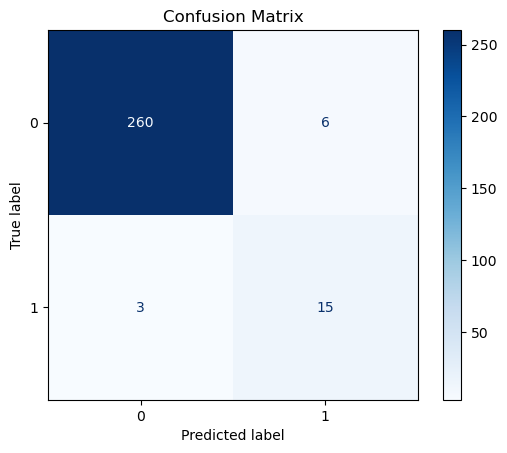

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix")
plt.savefig("confusion matrix.png", dpi=300, bbox_inches='tight')

                            Feature  Importance Mean  Importance Std
0                          Schiller         0.092606        0.007225
12                              Age         0.007042        0.004454
9   Hormonal Contraceptives (years)         0.004930        0.003227
2                          Citology         0.003169        0.001056
10                   Smokes (years)         0.001056        0.001614
1                        Hinselmann         0.000704        0.001408
3                         Dx:Cancer         0.000000        0.000000
4                                Dx         0.000000        0.000000
5               STDs:genital herpes         0.000000        0.000000
6                          STDs:HIV         0.000000        0.000000
7                            Dx:CIN        -0.000352        0.001056
8                     STDs (number)        -0.000704        0.001408
11                              IUD        -0.000704        0.003450


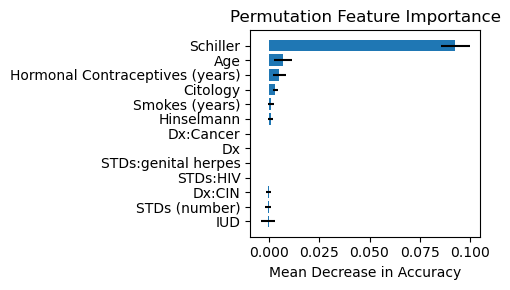

In [67]:
from sklearn.inspection import permutation_importance
feature_names = CervicalDF_selected.drop('Biopsy', axis=1).columns
X_test_df = pd.DataFrame(X_test, columns=feature_names)
# Perform permutation importance on the test set

best_model = model_gscv.best_estimator_
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')


importance_df = pd.DataFrame({
    'Feature': X_test_df.columns,  # assuming you used a DataFrame
    'Importance Mean': result.importances_mean,
    'Importance Std': result.importances_std
}).sort_values(by='Importance Mean', ascending=False)

print(importance_df)

# Plot the results
plt.figure(figsize=(5, 3))
plt.barh(importance_df['Feature'], importance_df['Importance Mean'], xerr=importance_df['Importance Std'])
plt.xlabel('Mean Decrease in Accuracy')
plt.title('Permutation Feature Importance')
plt.gca().invert_yaxis()  # Highest importance on top
plt.tight_layout()
plt.savefig("permutation feature importance.png", dpi=300, bbox_inches='tight')


In [68]:
important_features = importance_df[importance_df['Importance Mean'] > 0]['Feature'].values

print("Selected important features:")
print(important_features)

Selected important features:
['Schiller' 'Age' 'Hormonal Contraceptives (years)' 'Citology'
 'Smokes (years)' 'Hinselmann']


✍️ In medical applications, high recall is important because the consequences of missed diagnosis are serious.